In [5]:
import numpy as np
import math
from matplotlib import pylab as plt
from ROOT import TTree, TFile, TH2D, TCanvas, TH1F, gROOT
from root_numpy import array2hist, hist2array, fill_hist, tree2array, root2array, list_trees
import pandas as pd
from root_pandas import read_root


filenameg="../output/ClusterAllOne_main_phs1_gamma.root"
filename="../output/ClusterAllOne_main_phs1_electron.root"
inputFile=TFile(filename)
tree=inputFile.Get("PhaseSpace")
# tree.ls()
# tree.GetEntries()
# list_trees(filename)
inputFileg=TFile(filenameg)
treeg=inputFileg.Get("PhaseSpace")
# treeg.ls()
# treeg.GetEntries()

filename_2g="../output/output-lana2-PhS-g.root"
inputFile_2g=TFile(filename_2g)
tree_2g=inputFile_2g.Get("PhaseSpace")
# tree_2g.ls()
# tree_2g.GetEntries()

filename_2e="../output/output-lana2-PhS-e.root"
inputFile_2e=TFile(filename_2e)
tree_2e=inputFile_2e.Get("PhaseSpace")
# tree_2e.ls()
# tree_2e.GetEntries()


In [17]:
dfg = read_root(filenameg, columns=['X','Y','Z','dX', 'dY','dZ','Weight','Ekine'])
dfe = read_root(filename, columns=['X','Y','Z','dX', 'dY','dZ','Weight','Ekine'])

df_2g = read_root(filename_2g, columns=['X','Y','Z','dX', 'dY','dZ','Weight','Ekine'])
df_2e = read_root(filename_2e, columns=['X','Y','Z','dX', 'dY','dZ','Weight','Ekine'])
print(len(dfe),len(dfg),len(df_2e),len(df_2g))

331660 9581278 10574 187547


1716.8337
268368.94
14.341193
4840.7104


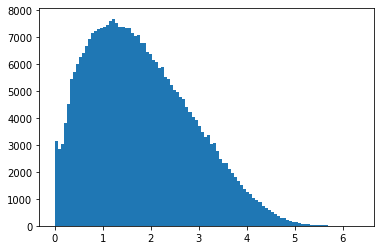

In [26]:
# dfe[['dX','dY']]
print(dfe['Weight'].sum(axis = 0, skipna = True) )
print(dfg['Weight'].sum(axis = 0, skipna = True) )
print(df_2e['Weight'].sum(axis = 0, skipna = True) )
print(df_2g['Weight'].sum(axis = 0, skipna = True))

_=plt.hist(dfe['Ekine'],bins=100)

In [ ]:
dfe['dXdY']=(dfe.dX**2+dfe.dY**2)**0.5
dfg['dXdY']=(dfg.dX**2+dfg.dY**2)**0.5
df_2e['dXdY']=(df_2e.dX**2+df_2e.dY**2)**0.5
df_2g['dXdY']=(df_2g.dX**2+df_2g.dY**2)**0.5

In [ ]:
ratioThetaXYe=dfe.dXdY/dfe.dZ
ratioThetaXe=dfe.dX/dfe.dZ
ratioThetaYe=dfe.dX/dfe.dZ

ratioThetaXYg=dfg.dXdY/dfg.dZ
ratioThetaXg=dfg.dX/dfg.dZ
ratioThetaYg=dfg.dX/dfg.dZ

ratioThetaXY_2e=df_2e.dXdY/df_2e.dZ
ratioThetaX_2e=df_2e.dX/df_2e.dZ
ratioThetaY_2e=df_2e.dX/df_2e.dZ

ratioThetaXY_2g=df_2g.dXdY/df_2g.dZ
ratioThetaX_2g=df_2g.dX/df_2g.dZ
ratioThetaY_2g=df_2g.dX/df_2g.dZ


In [ ]:
# def atanfunc:
    
df['thetaXY']=ratioThetaXY.apply(math.atan)*180/3.14
df['thetaX']=ratioThetaX.apply(math.atan)*180/3.14
df['thetaY']=ratioThetaY.apply(math.atan)*180/3.14

dfg['thetaXY']=ratioThetaXYg.apply(math.atan)*180/3.14
dfg['thetaX']=ratioThetaXg.apply(math.atan)*180/3.14
dfg['thetaY']=ratioThetaYg.apply(math.atan)*180/3.14

df_2e['thetaXY']=ratioThetaXY_2e.apply(math.atan)*180/3.14
df_2e['thetaX']=ratioThetaX_2e.apply(math.atan)*180/3.14
df_2e['thetaY']=ratioThetaY_2e.apply(math.atan)*180/3.14

df_2g['thetaXY']=ratioThetaXY_2g.apply(math.atan)*180/3.14
df_2g['thetaX']=ratioThetaX_2g.apply(math.atan)*180/3.14
df_2g['thetaY']=ratioThetaY_2g.apply(math.atan)*180/3.14

In [ ]:
df['XY']=(df.X**2+df.Y**2)**0.5
dfg['XY']=(dfg.X**2+dfg.Y**2)**0.5
df_2e['XY']=(df_2e.X**2+df_2e.Y**2)**0.5
df_2g['XY']=(df_2g.X**2+df_2g.Y**2)**0.5

In [ ]:
# _=plt.hist2d(df.X,df.Y)
# plt.colorbar()

# subdf = df[(df['X']>0) & (df['Y']>0)]
# subdfg = dfg[(dfg['X']>0) & (dfg['Y']>0)]
# subdf_2e = df_2e[(df_2e['X']>0) & (df_2e['Y']>0)]
# subdf_2g = df_2g[(df_2g['X']>0) & (df_2g['Y']>0)]

# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
# plt.figure(1)
# plt.gca()
# histrad=ax1.hist2d(df.X,df.Y,bins=[40,40])
# ax1.set_xlabel('X (mm)')
# ax1.set_ylabel('Y (mm)')
# type(histrad[0])
# plt.colorbar(histrad[0]) 
fig,ax=plt.subplots(2,2,figsize=(16,8))
histrad=ax[0,0].hist2d(df.X,df.Y,bins=[80,80])
ax[0,0].set_xlabel('X (mm)')
ax[0,0].set_ylabel('Y (mm)')
fig.colorbar(mappable=histrad[3], ax=ax[0,0]) 
# plt.figure(2)
histradg=ax[0,1].hist2d(dfg.X,dfg.Y,bins=[500,500])
ax[0,1].set_xlabel('X (mm)')
ax[0,1].set_ylabel('Y (mm)')
fig.colorbar(mappable=histradg[3], ax=ax[0,1]) 

histrad_2e=ax[1,0].hist2d(df_2e.X,df_2e.Y,bins=[80,80],cmax=20)
ax[1,0].set_xlabel('X (mm)')
ax[1,0].set_ylabel('Y (mm)')
cb=fig.colorbar(mappable=histradg[3], ax=ax[1,0]) 
# cb.ax.set_xlim(0, 400)

histrad_2g=ax[1,1].hist2d(df_2g.X,df_2g.Y,bins=[200,200])
ax[1,1].set_xlabel('X (mm)')
ax[1,1].set_ylabel('Y (mm)')
fig.colorbar(mappable=histradg[3], ax=ax[1,1]) 

# fig.savefig('beamProfiles.png')



In [ ]:
x0=histrad[0][:,0]
y0=histrad[0][0,:]
x0=x0+y0
print(x0.shape)
ran=np.arange(0,len(x0))
print(ran.shape)
plt.plot(ran,x0)

In [ ]:
histxy=plt.hist(subdf.XY,bins=40)
arrxy=histxy[0]
arrxyy=np.arange(1,41)
print(arrxy)
print(arrxyy)
divxy=arrxy/arrxyy
print(divxy)

In [ ]:
plt.plot(divxy)

In [ ]:
_=plt.hist(df.thetaXY,bins=100,histtype=u'step',density=True)
_=plt.hist(dfg.thetaXY,bins=100,histtype=u'step',density=True,color='red')
# plt.gca().invert_yaxis()


In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,4))

_=ax[0].hist(df.thetaX[df.XY<5],bins=100,histtype=u'step',density=True)
_=ax[0].hist(df.thetaX[df.XY<35],bins=100,histtype=u'step',color='red',density=True)
_=ax[1].hist(dfg.thetaX[dfg.XY<5],bins=100,histtype=u'step',color='green',density=True)
_=ax[1].hist(dfg.thetaX[dfg.XY<35],bins=100,histtype=u'step',color='blue',density=True)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,4))

_=ax[0].hist(-df.thetaXY[df.XY<5],bins=100,histtype=u'step',density=True)
_=ax[0].hist(-df.thetaXY[df.XY<35],bins=100,histtype=u'step',color='red',density=True)
ax[0].set_xlabel
_=ax[1].hist(-dfg.thetaXY[dfg.XY<5],bins=100,histtype=u'step',density=True)
_=ax[1].hist(-dfg.thetaXY[dfg.XY<35],bins=100,histtype=u'step',color='red',density=True)

In [ ]:
_=plt.hist2d(df.X,df.dX)